### Setting up the environment

In [2]:
%matplotlib inline
import pandas as pd

import numpy as np
# import matplotlib.pyplot as plt
from IPython.display import Image, display
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
import ijson
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5

### Cleaning the data script

In [ ]:
import json
write_csv = open('processed/kick.csv','w')
json_file_path = '/home/rh0101/accion-dev/j-books/pydata-talk/data/Kickstarter_2017-10-15T10_20_38_271Z.json'

headers= 'id,deadline,launched_at,state,category_type_subtype,location_type,backers_count,currency,goal,pledged,spotlight,static_usd_rate,usd_pledged,country,country_state\n'

write_csv.write(headers)

for line in open(json_file_path):
  obj = json.loads(line)
  temp_data = []
  try :
    temp_data.append(str(obj["data"]["id"]))
    temp_data.append(str(obj["data"]["deadline"]))
    temp_data.append(str(obj["data"]["launched_at"]))
    temp_data.append(str(obj["data"]["state"]))
    temp_data.append(str(obj["data"]["category"]["slug"]))
    try :
        temp_data.append(str(obj["data"]["location"]["type"]))
    except Exception as e:
        temp_data.append('None')
    temp_data.append(str(obj["data"]["backers_count"]))
    temp_data.append(str(obj["data"]["currency"]))
    temp_data.append(str(obj["data"]["goal"]))
    temp_data.append(str(obj["data"]["pledged"]))
    temp_data.append(str(obj["data"]["spotlight"]))
    temp_data.append(str(obj["data"]["static_usd_rate"]))
    temp_data.append(str(obj["data"]["usd_pledged"]))
    temp_data.append(str(obj["data"]["country"]))
    try:
        temp_data.append(str(obj["data"]["location"]["localized_name"]))
    except Exception as e:
        temp_data.append('None')
    write_csv.write(','.join(temp_data) + '\n')
  except Exception as e:
    print('error', e)

write_csv.close()


### Importing Dataset

In [3]:
# import dataset
kickstarter_file_path = '/home/rh0101/dev/blog-code/kickstarter-exploritory-analysis/processed/kick.csv'

kick_df = pd.read_csv(kickstarter_file_path)

In [ ]:
kick_df.head()

### Cleaning and Transforming data

#### Extracting category type and subtypes

In [4]:
kick_df['category_type'] = kick_df['category_type_subtype'].apply(lambda x: x.split('/')[0])
kick_df['category_subtype'] = kick_df['category_type_subtype'].apply(lambda x: x.split('/')[1])

#### Fixing date time columns

In [5]:
kick_df['deadline'] = pd.to_datetime(kick_df['deadline'], unit='s', )
kick_df['launched_at'] = pd.to_datetime(kick_df['launched_at'], unit='s', )
# drop the redundant column
kick_df.drop(['category_type_subtype'], axis=1, inplace=True)

#### Changing dtype of series

In [6]:
# change the resolution of the floating point number
kick_df["goal"] = kick_df["goal"].astype("float32")
kick_df["pledged"] = kick_df["goal"].astype("float32")
kick_df["pledged"] = kick_df["goal"].astype("float32")
kick_df["usd_pledged"] = kick_df["goal"].astype("float32")

#### Dealing with missing values

In [7]:
kick_df.replace('None',np.NaN, inplace=True)

In [8]:
kick_df.isnull().sum()

id                    0
deadline              0
launched_at           0
state                 0
location_type       681
backers_count         0
currency              0
goal                  0
pledged               0
spotlight             0
static_usd_rate       0
usd_pledged           0
country               0
country_state       681
category_type         0
category_subtype      0
dtype: int64

In [9]:
kick_df.dropna(inplace=True)

#### Fixing Categorical variables

In [10]:
category_variables = ['country','category_subtype','category_type','location_type','country_state','state','currency']
for cat_var in category_variables:
    kick_df[cat_var] = kick_df[cat_var].astype('category')

### Variables of interest

In [ ]:
##  [1] "id"                            "backers_count"                
##  [3] "country"                       "creator.failed_experience"    
##  [5] "creator.id"                    "creator.successful_experience"
##  [7] "creator.total_experience"      "currency"                     
##  [9] "deadline"                      "goal"                         
## [11] "launched_at"                   "pledged"                      
## [13] "slug"                          "spotlight"                    
## [15] "state"                         "static_usd_rate"              
## [17] "usd_goal"                      "usd_pledged"                  
## [19] "category_name"                 "location_country"             
## [21] "location_type"                 "location_name"                
## [23] "category_parent"               "launched_at_month"            
## [25] "launched_at_year"              "launched_weekday"             
## [27] "deadline_weekday"

#### Project state distribution

In [11]:
kick_df.groupby('state')['id'].count().sort_values(ascending=False)

state
successful    73272
failed        70305
canceled       8666
live           3591
suspended       612
Name: id, dtype: int64

#### Project category distribution

In [12]:
kick_df.groupby('category_type')['id'].count().sort_values(ascending=False)

category_type
music           23497
film & video    22854
technology      17457
art             16927
publishing      16222
food            12365
games           10483
fashion          8515
design           5828
comics           5343
photography      4902
crafts           3962
theater          3759
journalism       2931
dance            1401
Name: id, dtype: int64

#### Project count from Top 10 countries 

In [13]:
kick_df.groupby('country')['id'].count().sort_values(ascending=False)[0:10]

country
US    121550
GB     14232
CA      6404
AU      3414
DE      1677
NL      1318
FR      1205
IT      1169
ES       891
SE       795
Name: id, dtype: int64

## Plots

### Project states

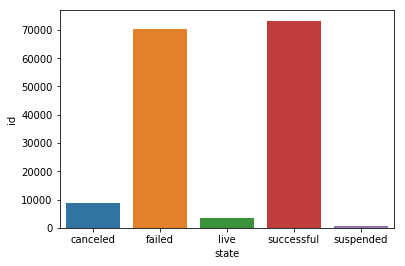

In [14]:
project_state_grp = kick_df.groupby('state')['id'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='state',y='id',data=project_state_grp)

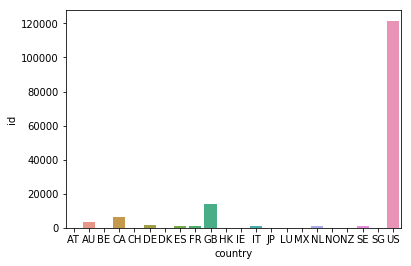

In [17]:
# plt.figure()
country_grp = kick_df.groupby('country')['id'].count().sort_values(ascending=False)[0:10].reset_index()
sns.barplot(x='country',y='id',data=country_grp)

In [18]:
country_us_df = kick_df[kick_df['country'] == 'US']
country_us_state_grp = country_us_df.groupby('country_state')['id'].count().sort_values(ascending=False)[0:20].reset_index()

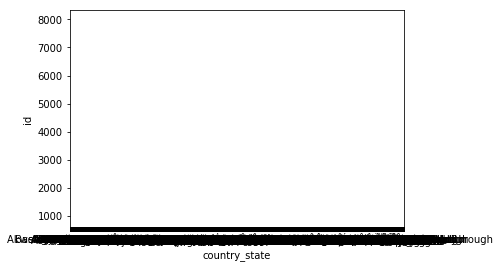

In [20]:
# plt.figure()
sns.boxplot(x='country_state',y='id', data=country_us_state_grp)